In [1]:
import cv2
import numpy as np

video = cv2.VideoCapture('C:/Users/Yehe/Downloads/IMG_4341.mov')
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
frame_size = (512, 512)
video_array = np.empty((total_frames, frame_size[1], frame_size[0], 3), dtype=np.uint8)
for i in range(total_frames):
    ret, frame = video.read()
    if ret:
        scaled_frame = cv2.resize(frame, frame_size)
        video_array[i] = scaled_frame
    else:
        break
video.release()

In [2]:
video_array.shape

gray = video_array.mean(axis=3).astype(np.uint8)

In [6]:
import tifffile
# tifffile.imsave('C:/Users/Yehe/Downloads/IMG_4341.tif', gray)

In [9]:
def resample_matrix(matrix: np.ndarray, p: float) -> np.ndarray:
    z, x, y = matrix.shape
    prob_matrix = np.full((z, x, y), p)
    return np.random.binomial(matrix, prob_matrix)

In [4]:
mean = gray.mean()
print(0.125/mean)

0.003557604797175741


In [13]:
from matplotlib import pyplot as plt
for i in range(-7, -2):
    p = 2**i / mean
    sample = resample_matrix(gray, p).astype(np.uint8)
    tifffile.imwrite(f'C:/Users/Yehe/Downloads/RES_4341_p={2**i:.5f}_noclip_b.tif', sample)
    sample = (sample > 0).astype(np.uint8)
    mean_signal = sample.mean()
    tifffile.imwrite(f'C:/Users/Yehe/Downloads/RES_4341_p={2**i:.5f}_m={mean_signal:.5f}b.tif', sample)
    print(p, mean_signal)

0.007115209594351482 0.2013036598836569
0.014230419188702964 0.33608253498125196


(array([16283., 65645., 98200., 65562.,     0., 16454.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  3.5,  4.5]),
 <BarContainer object of 6 artists>)

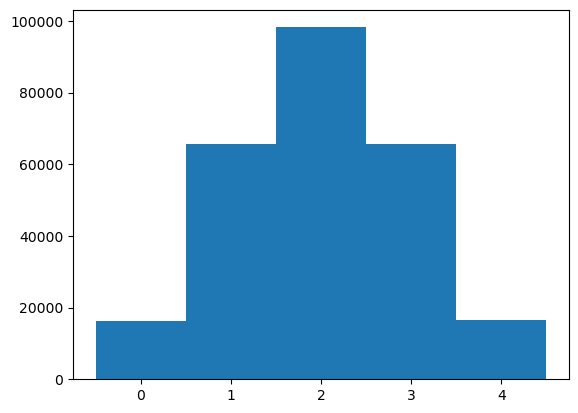

In [30]:
import matplotlib.pyplot as plt
import numpy as np
data = np.full((512, 512, 512), 4)
p = np.full((512, 512, 512), 0.5)
dist = np.random.binomial(data, p)
plt.hist(dist[300].flatten(), bins=(-0.5,0.5, 1.5, 2.5, 3.5, 3.5, 4.5))

In [1]:
from manim import *

class UNetAnimation(Scene):
    def construct(self):
        # Define colors
        down_color = BLUE
        up_color = RED
        final_color = GREEN
        operation_color = YELLOW

        # Create input and output labels
        input_label = Text("Input").scale(0.5)
        output_label = Text("Output").scale(0.5)

        # Create Down Convs
        down_convs = [
            Rectangle(width=1.5, height=0.8, fill_color=down_color, fill_opacity=0.5)
            for _ in range(2)
        ]
        down_convs_text = [Text(f"Down Conv {i+2}").scale(0.3) for i in range(2)]
        down_group = VGroup(*[
            VGroup(conv, text).arrange(DOWN, buff=0.1)
            for conv, text in zip(down_convs, down_convs_text)
        ]).arrange(DOWN, buff=0.5)

        # Create operation blocks for Down Convs
        down_operations = [
            [
                Rectangle(width=0.8, height=0.4, fill_color=operation_color, fill_opacity=0.5),
                Rectangle(width=0.8, height=0.4, fill_color=operation_color, fill_opacity=0.5),
                Rectangle(width=0.8, height=0.4, fill_color=operation_color, fill_opacity=0.5)
            ]
            for _ in range(2)
        ]
        down_operations_text = [
            [Text("Conv3x3", font_size=18), Text("ReLU", font_size=18), Text("MaxPool", font_size=18)]
            for _ in range(2)
        ]

        # Position operation blocks for Down Convs
        for i, (conv, operations, operations_text) in enumerate(zip(down_convs, down_operations, down_operations_text)):
            for j, (op, op_text) in enumerate(zip(operations, operations_text)):
                op.next_to(conv, RIGHT, buff=0.3 + j * 0.4)
                op_text.move_to(op.get_center())

        # Create Up Convs
        up_convs = [Rectangle(width=1.5, height=0.8, fill_color=up_color, fill_opacity=0.5)]
        up_convs_text = [Text("Up Conv 1").scale(0.3)]
        up_group = VGroup(*[
            VGroup(conv, text).arrange(DOWN, buff=0.1)
            for conv, text in zip(up_convs, up_convs_text)
        ]).arrange(UP, buff=0.5)

        # Create operation blocks for Up Convs
        up_operations = [
            [
                Rectangle(width=0.8, height=0.4, fill_color=operation_color, fill_opacity=0.5),
                Rectangle(width=0.8, height=0.4, fill_color=operation_color, fill_opacity=0.5),
                Rectangle(width=0.8, height=0.4, fill_color=operation_color, fill_opacity=0.5)
            ]
        ]
        up_operations_text = [
            [Text("UpConv", font_size=18), Text("Conv3x3", font_size=18), Text("ReLU", font_size=18)]
        ]

        # Position operation blocks for Up Convs
        for conv, operations, operations_text in zip(up_convs, up_operations, up_operations_text):
            for j, (op, op_text) in enumerate(zip(operations, operations_text)):
                op.next_to(conv, LEFT, buff=0.3 + j * 0.4)
                op_text.move_to(op.get_center())

        # Create Final Conv
        final_conv = Rectangle(width=1.5, height=0.8, fill_color=final_color, fill_opacity=0.5)
        final_conv_text = Text("Final Conv").scale(0.3)
        final_group = VGroup(final_conv, final_conv_text).arrange(DOWN, buff=0.1)

        # Create operation block for Final Conv
        final_operation = Rectangle(width=0.8, height=0.4, fill_color=operation_color, fill_opacity=0.5)
        final_operation_text = Text("Conv1x1", font_size=18).move_to(final_operation.get_center())
        final_operation.next_to(final_conv, RIGHT, buff=0.3)

        # Position groups
        input_label.next_to(down_group, UP, buff=0.3)
        down_group.shift(2.5 * LEFT + UP)
        up_group.shift(2.5 * RIGHT)
        final_group.next_to(up_group, UP, buff=0.5)
        output_label.next_to(final_group, UP, buff=0.3)

        # Create skip connection arrows
        skip_arrows = [
            Arrow(
                down_convs[i].get_right(), up_convs[-1].get_left(),
                buff=0.2, color=WHITE, stroke_width=2, tip_length=0.2
            )
            for i in range(len(down_convs))
        ]

        # Animate input and output labels
        self.play(Write(input_label), Write(output_label))

        # Animate Down Convs and their operations
        for conv, text, operations, operations_text in zip(down_convs, down_convs_text, down_operations, down_operations_text):
            self.play(FadeIn(conv), Write(text))
            for op, op_text in zip(operations, operations_text):
                self.play(FadeIn(op), Write(op_text))

        # Animate skip connection arrows
        for arrow in skip_arrows:
            self.play(GrowArrow(arrow))

        # Animate Up Convs and their operations
        for conv, text, operations, operations_text in zip(up_convs, up_convs_text, up_operations, up_operations_text):
            self.play(FadeIn(conv), Write(text))
            for op, op_text in zip(operations, operations_text):
                self.play(FadeIn(op), Write(op_text))

        # Animate Final Conv and its operation
        self.play(FadeIn(final_conv), Write(final_conv_text))
        self.play(FadeIn(final_operation), Write(final_operation_text))

        self.wait(2)

Manim Community v0.18.0

In [2]:
scene = UNetAnimation()
scene.render()


[03/20/24 10:30:38] INFO     Animation 0 : Partial movie file written in                   ]8;id=239719;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=139049;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\3977891868_2794242388_223132457.mp4'                               

[03/20/24 10:30:41] INFO     Animation 1 : Partial movie file written in                   ]8;id=625365;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=557768;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_162553210_1317406331.mp4'                               

[03/20/24 10:30:43] INFO     Animation 2 : Partial movie file written in                   ]8;id=956353;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=647987;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_1400559593_658442846.mp4'                               

[03/20/24 10:30:45] INFO     Animation 3 : Partial movie file written in                   ]8;id=985506;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=54873;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_3146240645_2230646211.mp4'                              

[03/20/24 10:30:47] INFO     Animation 4 : Partial movie file written in                   ]8;id=571376;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=513010;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_2970967296_1976443625.mp4'                              

[03/20/24 10:30:50] INFO     Animation 5 : Partial movie file written in                   ]8;id=569759;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=373925;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_1685500758_2213801413.mp4'                              

[03/20/24 10:30:52] INFO     Animation 6 : Partial movie file written in                   ]8;id=941953;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=273413;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_3305404410_3223564722.mp4'                              

[03/20/24 10:30:54] INFO     Animation 7 : Partial movie file written in                   ]8;id=737603;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=990479;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_3973593983_1898144405.mp4'                              

[03/20/24 10:30:57] INFO     Animation 8 : Partial movie file written in                   ]8;id=648093;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=425536;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_1059418301_850019761.mp4'                               

[03/20/24 10:30:59] INFO     Animation 9 : Partial movie file written in                   ]8;id=472923;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=899614;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_2826243523_40465570.mp4'                                

[03/20/24 10:31:01] INFO     Animation 10 : Partial movie file written in                  ]8;id=938875;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=968026;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_4183082393_1799053260.mp4'                              

[03/20/24 10:31:04] INFO     Animation 11 : Partial movie file written in                  ]8;id=763338;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=902503;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_2815617352_1473967142.mp4'                              

[03/20/24 10:31:06] INFO     Animation 12 : Partial movie file written in                  ]8;id=987386;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=409567;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_140501327_2429839901.mp4'                               

[03/20/24 10:31:09] INFO     Animation 13 : Partial movie file written in                  ]8;id=865171;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=976663;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_993207105_4112891927.mp4'                               

[03/20/24 10:31:12] INFO     Animation 14 : Partial movie file written in                  ]8;id=527892;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=254001;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_1459929912_85293880.mp4'                                

[03/20/24 10:31:15] INFO     Animation 15 : Partial movie file written in                  ]8;id=266345;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=564197;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_1311264824_3239465290.mp4'                              

[03/20/24 10:31:18] INFO     Animation 16 : Partial movie file written in                  ]8;id=624632;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=733167;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_3382575070_4033662479.mp4'                              

[03/20/24 10:31:22] INFO     Animation 17 : Partial movie file written in                  ]8;id=529252;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=486831;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\projects\spadsampler\media\videos\1080p60\partial_movie_f                         
                             iles\UNetAnimation\2852726489_634017564_3265526621.mp4'                               

                    INFO     Combining to Movie file.                                      ]8;id=37015;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=891215;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=40401;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=451171;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\projects\spadsampler\media\videos\1080p60\UNetAnimation.m                         
                             p4'                                                                                   
                                                                                                                   

                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=944018;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=313284;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene_file_writer.py#707\707]8;;\
                             manim has removed the 18 oldest file(s). You can change this                          
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered UNetAnimation                                                    ]8;id=147909;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=648627;file://c:\Users\Yehe\miniforge3\envs\spadsampler\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 18 animations                                                                  